### Part 1: Intro to the Fit / Predict Methods and Linear vs. Non Linear Models

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import sklearn
# import warnings filter
from warnings import simplefilter
# ignore all future warnings / convergence warnings, !!! In a real workflow do not do this !!!
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=sklearn.exceptions.ConvergenceWarning)
from jupyterthemes import jtplot # Ignore this - specific to my dark theme plugin
jtplot.style(theme='onedork')  # Ignore this - specific to my dark theme plugin
jtplot.style(ticks=True, grid=True, figsize=(10, 8)) # Ignore this - specific to my dark theme plugin
# The below is Jupyter "Cell Magic" that allows the matplotlib charts to render in notebook.
%matplotlib inline

### We will now import a handful of different ML Classifiers from Scikit-Learn
In Sklearn classification algorithm are implemented as Python classes (in the OOP sense),
they all share a common set of methods that makes their usage uniform. To use them start
by importing the desired classifier and initiallizing it with the desired hyperparameters:
```
from sklearn.classifer_subpackage import ClassiferName 
clf = ClassiferName(*hyperparamters)
```

In [2]:
# Example with Commonly Used ML Classifiers
from sklearn.svm import LinearSVC   # Linear Support Vector Machine (SVM) Classifier
from sklearn.linear_model import LogisticRegression  # Logisitc Regression Classifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Simple Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.neural_network import MLPClassifier # Multilayer Perceptron Algorithm

# We will use all the default hyperparameters to start, in a later module we will discuss 
# hyperparamter tuning. Example of hyperparameters include regularization type,
# regularization coefficient, class weighting, maximum tree depth, etc...
clf_svc = LinearSVC()
clf_lr = LogisticRegression()
clf_nb = GaussianNB()
clf_dt = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_mlp = MLPClassifier()

# We will make a dictionary of these classifiers to allow us to loop through them
classifiers = {
    'linear svc': clf_svc,
    'logistic regression': clf_lr,
    'gaussian naive bayes': clf_nb,
    'decision tree': clf_dt,
    'random forest': clf_rf,
    'multilayer perceptron': clf_mlp
}

#### Support Vector Machines:
* wiki:  https://en.wikipedia.org/wiki/Support_vector_machine
* sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

#### Logistic Regression:
* wiki: https://en.wikipedia.org/wiki/Logistic_regression
* sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Naive Bayes
* wiki: https://en.wikipedia.org/wiki/Naive_Bayes_classifier
* sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

#### Decision Trees
* wiki: https://en.wikipedia.org/wiki/Decision_tree_learning
* sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### Random Forest
* wiki: https://en.wikipedia.org/wiki/Random_forest
* sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### Multilayer Perceptron
* wiki: https://en.wikipedia.org/wiki/Multilayer_perceptron
* sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

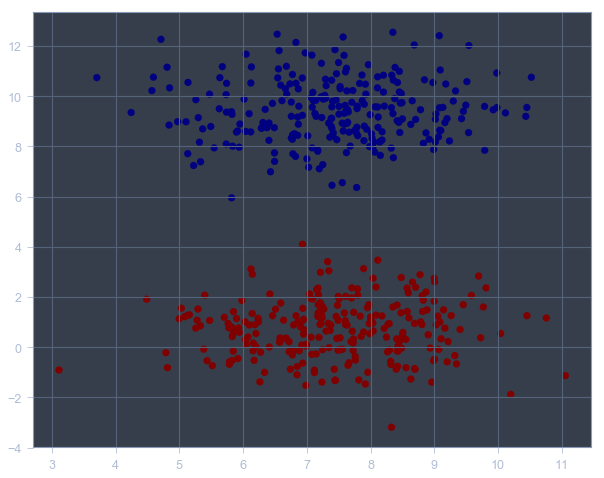

In [3]:
# Create a toy data set of 2 labeled classes of 2-dimensional data, will first start with 
# classes which are "linearly Separable".
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=500, 
                          centers=2,
                          cluster_std=1.2,
                          random_state=8)
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0],
            X[:,1],
            c=y, # Color the points by their class
            s=50, # Set the size of markers
            cmap='jet')
plt.show()

#### Fit and Predict Methods
Every sklearn classifier has the fit and predict method. When the classifier is first initialized
its weights and/or other learnable parameters of the model will not be set. Using the fit method on
your data will run the underlying learning algorithm and persist the resulting model which can then be used to make new predictions via the predict method.
```
X, y = example_data, example_labels
X_new = data_not_in_example_data
clf.fit(X, y)
y_new = clf.predict(X_new
```

In [4]:
# Fit our classifiers on this first example:
clf_svc.fit(X, y) # example fitting one at a time
test_X = np.array((0,8)).reshape((1,-1)) # reshape into 1 X 2 matrix.
print(f"test_X: {test_X}\ntest_X shape: {test_X.shape}")
# Sklearn classifiers do everything as batches, so to predict the data must always be
# entered as a 2d-array (Matrix) of shape batch_size x data_dimension (B x D). So to predict
# on a single datum need a 1 x D array. 
print(f"Prediced class: {clf_svc.predict(test_X)}")
# Using our classifier dictionary to loop over classifiers:
for clf in classifiers:
    classifiers[clf].fit(X, y)

test_X: [[0 8]]
test_X shape: (1, 2)
Prediced class: [0]


In [5]:
# Write a function to visualize the decision boundary of the fitted classifier.
# This function will fit our classifiers for us during its execution
def visualize_boundary(clf, X, Y, x_lim=None, y_lim=None):
    '''Input a (scikit-learn) classifier and data (with 2 attributes) and this function will automatically
       plot a scatter of the data with the classifier's decision boundary'''
    clf.fit(X,Y)
    if x_lim == None:  
        x_lim = (X[:,0].min() - 0.1, X[:,0].max() + 0.2)
    if y_lim == None:
        y_lim = (X[:,1].min() - 0.1, X[:,1].max() + 0.2)
    xx, yy = np.meshgrid(np.arange(x_lim[0],x_lim[1],0.1),np.arange(y_lim[0],y_lim[1],0.1))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.scatter(X[:,0],X[:,1],c=Y,cmap='jet_r',s=50)
    plt.contourf(xx,yy,Z,cmap='rainbow',alpha=0.16)

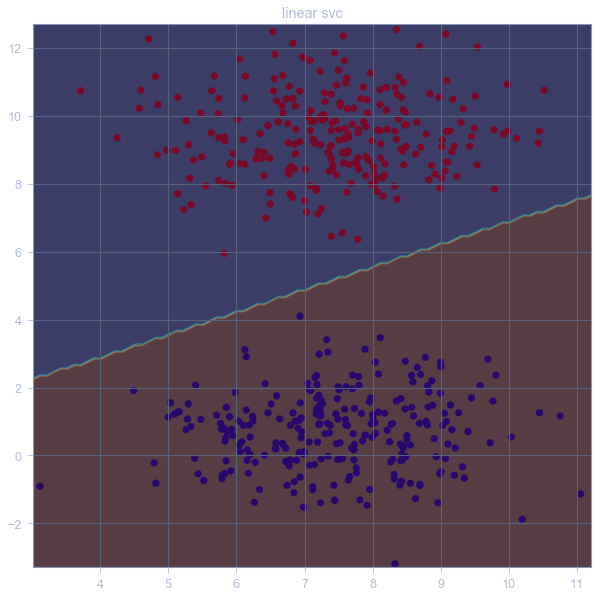

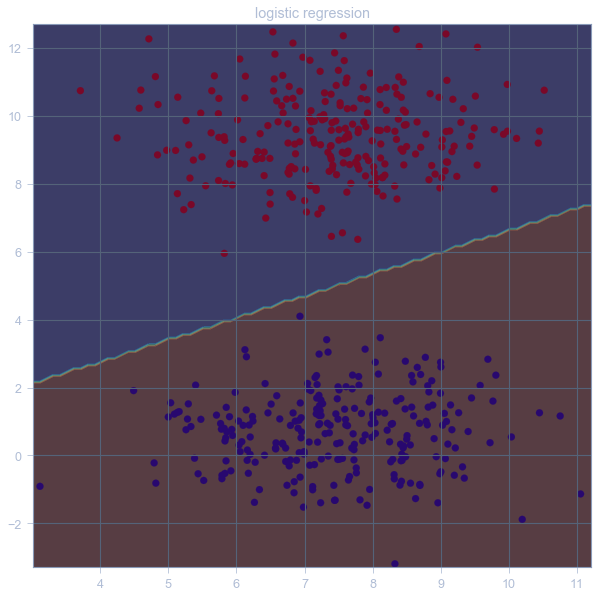

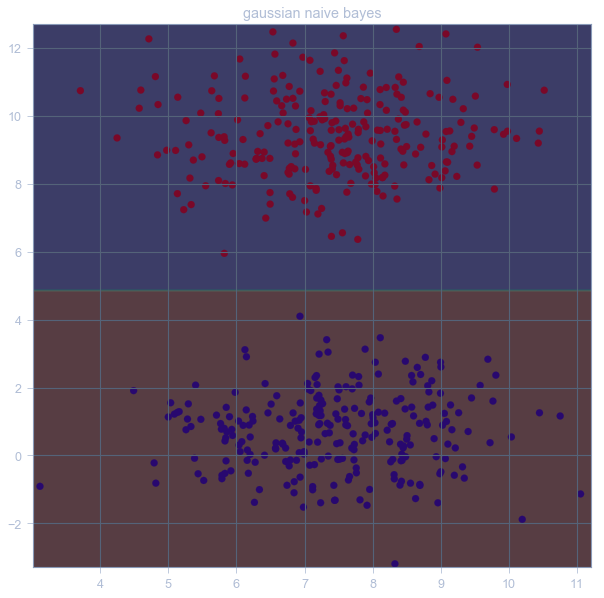

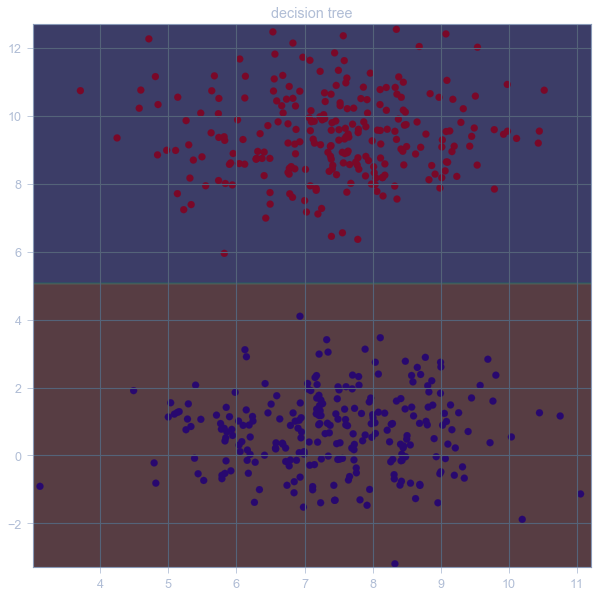

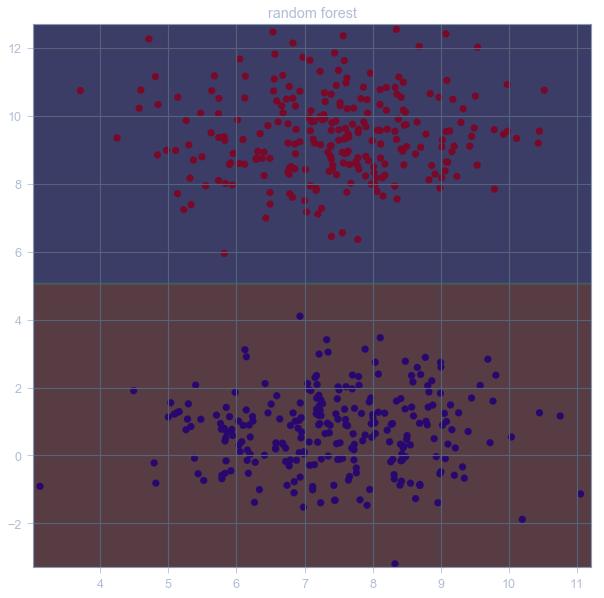

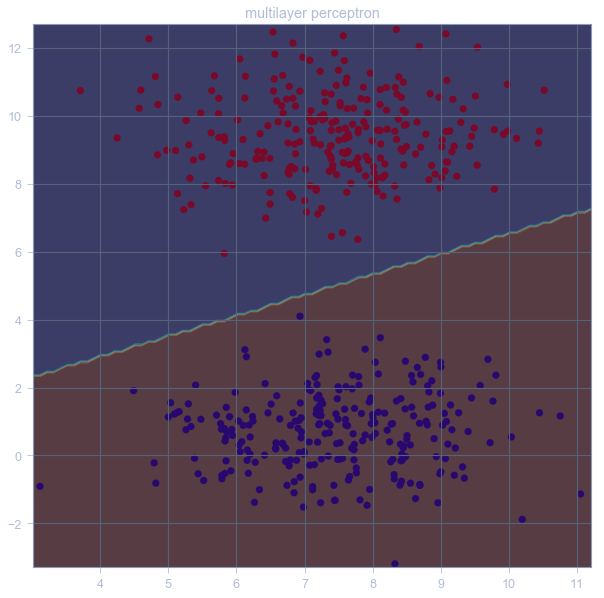

In [6]:
for clf in classifiers:
    visualize_boundary(classifiers[clf], X, y)
    plt.title(clf)
    plt.show()

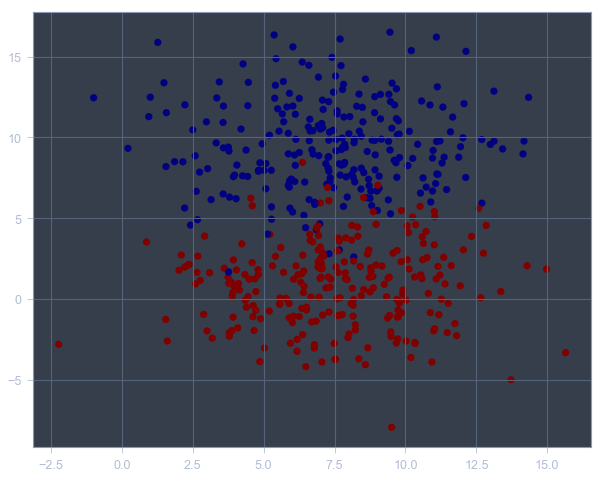

In [7]:
# Let's do a dataset that has moderate overlap
X, y = datasets.make_blobs(n_samples=500, 
                          centers=2,
                          cluster_std=2.7,
                          random_state=8)
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0],
            X[:,1],
            c=y, # Color the points by their class
            s=50, # Set the size of markers
            cmap='jet')
plt.show()

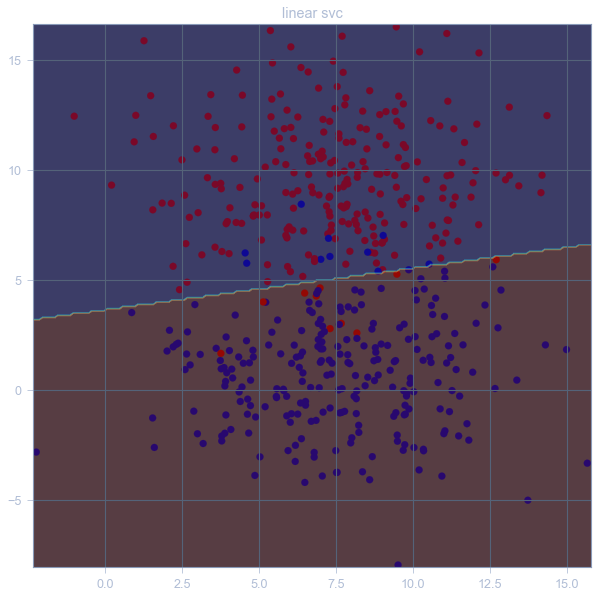

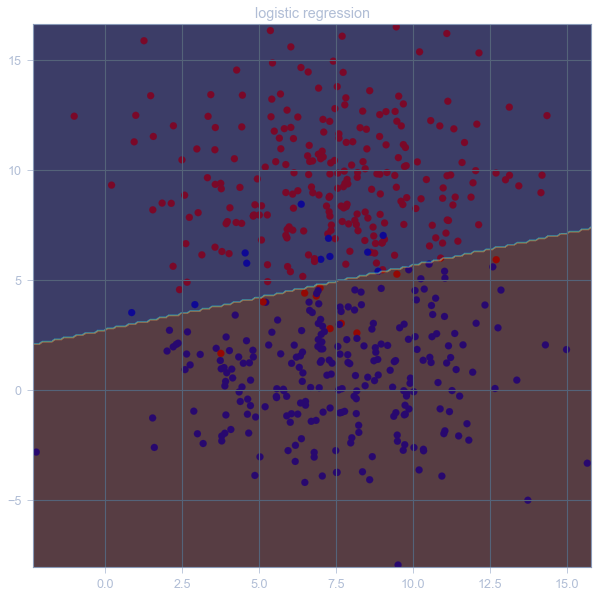

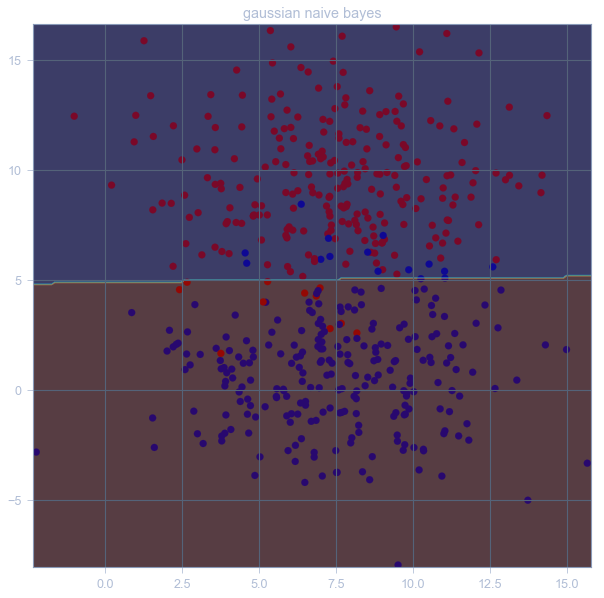

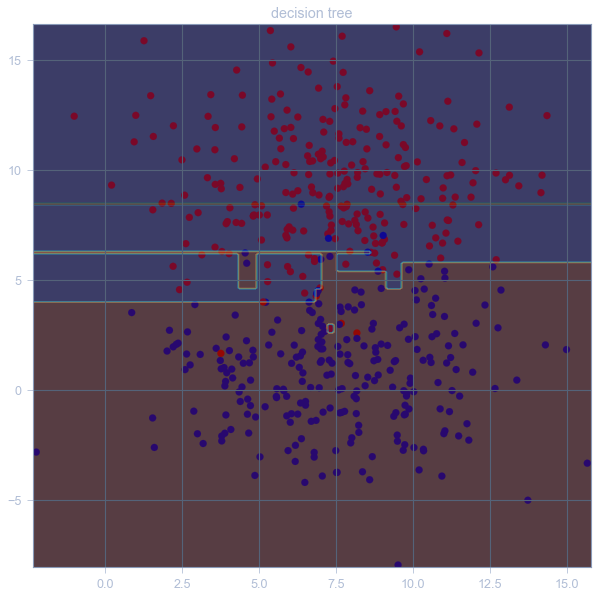

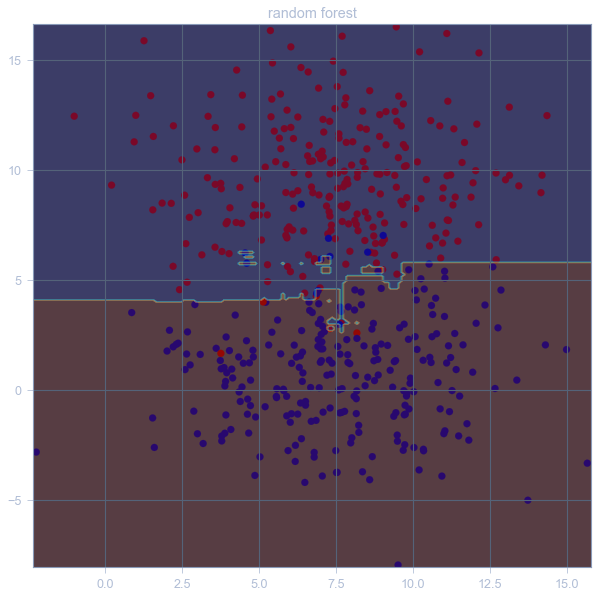

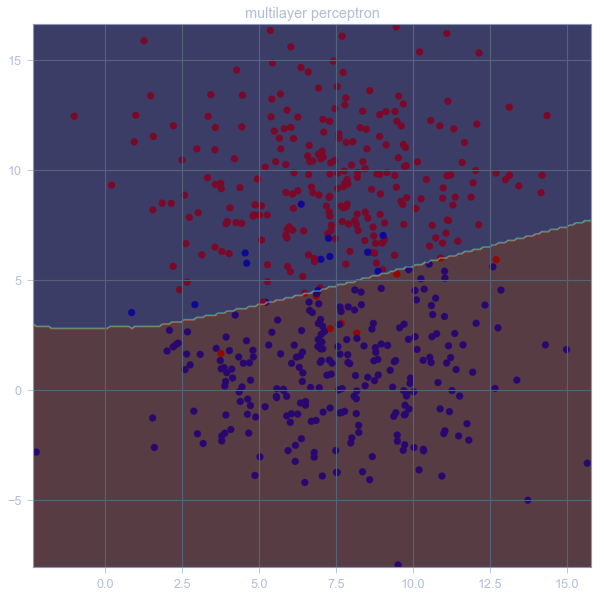

In [8]:
for clf in classifiers:
    visualize_boundary(classifiers[clf], X, y)
    plt.title(clf)
    plt.show()

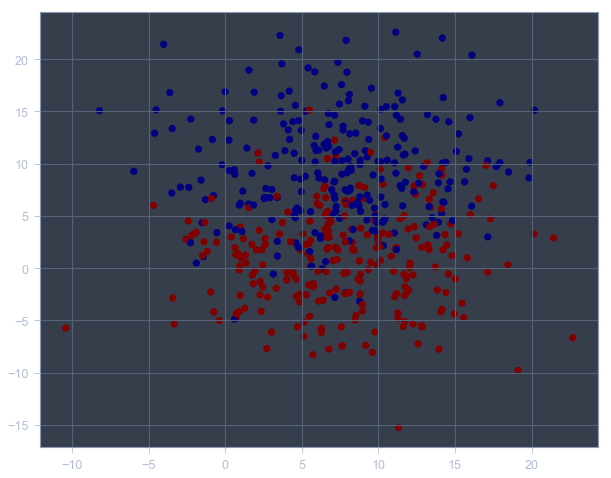

In [9]:
# Let's now try very overalapped data
X, y = datasets.make_blobs(n_samples=500, 
                          centers=2,
                          cluster_std=5,
                          random_state=8)
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0],
            X[:,1],
            c=y, # Color the points by their class
            s=50, # Set the size of markers
            cmap='jet')
plt.show()

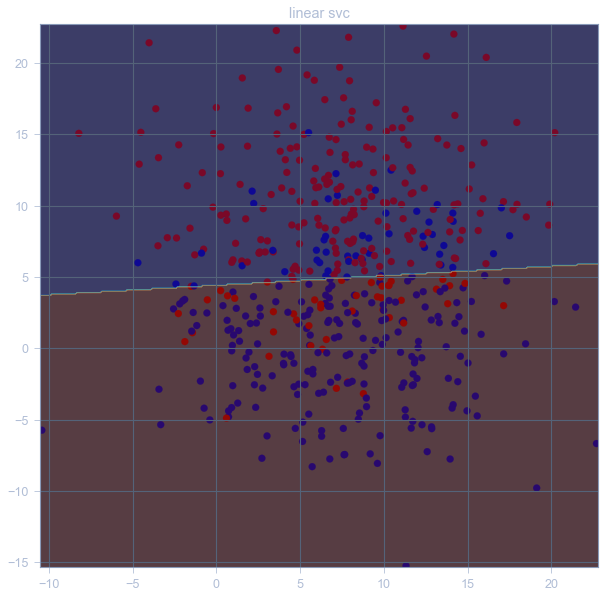

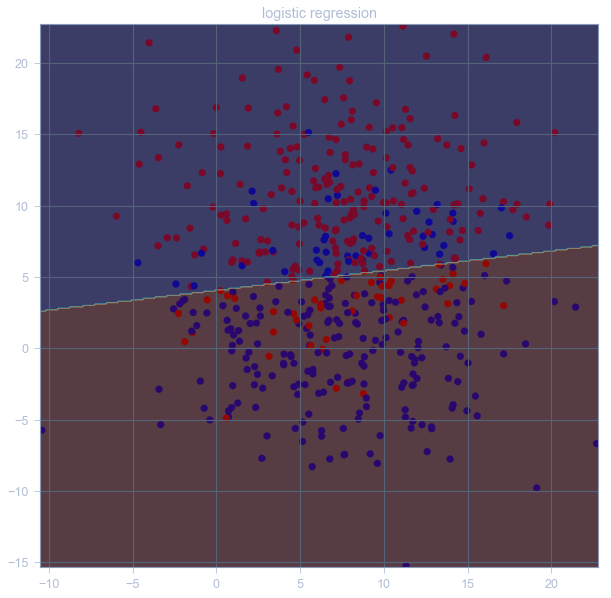

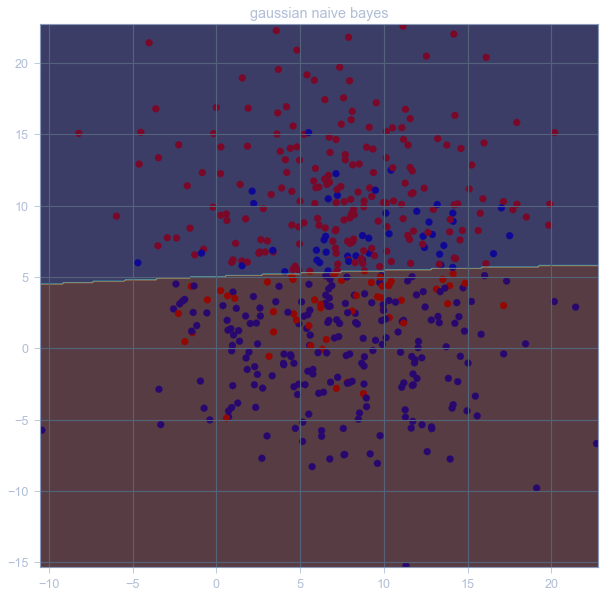

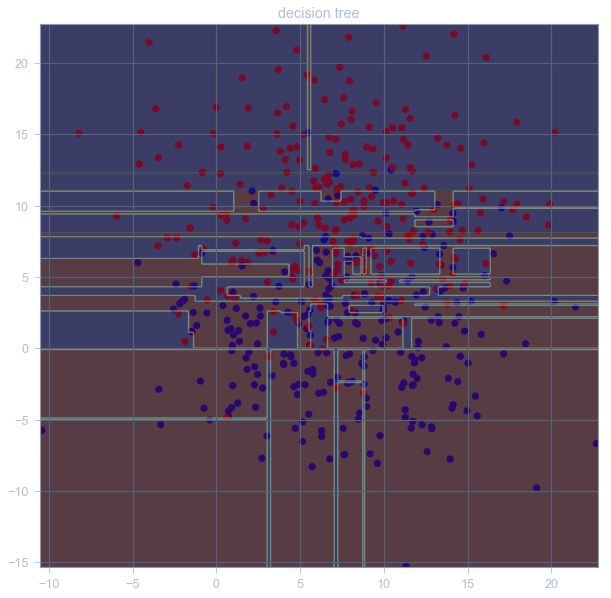

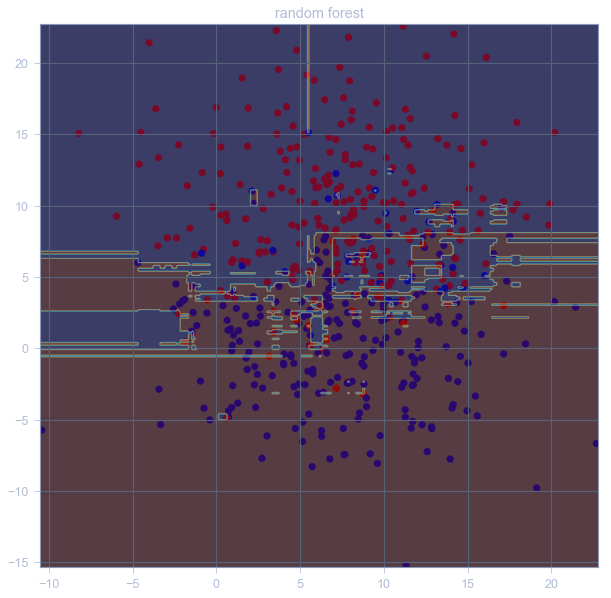

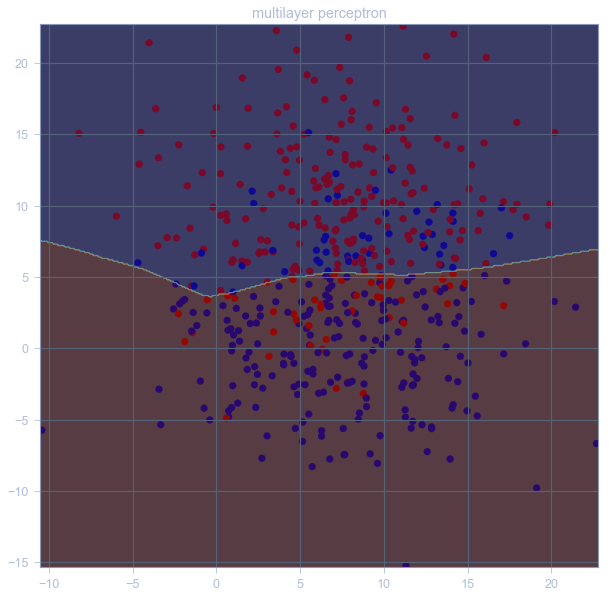

In [10]:
for clf in classifiers:
    visualize_boundary(classifiers[clf], X, y)
    plt.title(clf)
    plt.show()

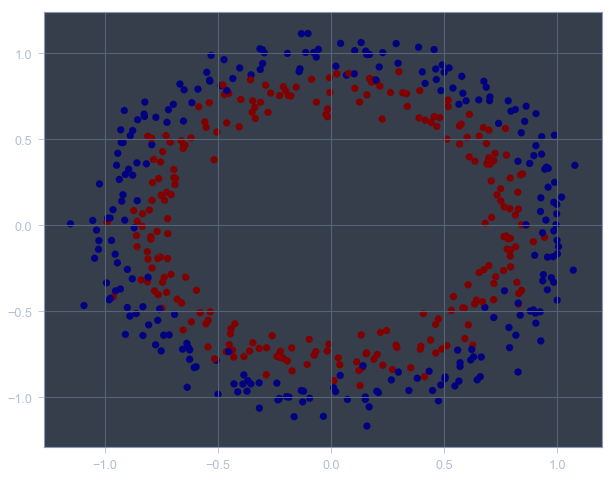

In [11]:
# Very non-linearly separable data
X, y = datasets.make_circles(n_samples=500,
                             noise=0.07,
                             random_state=2020)
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0],
            X[:,1],
            c=y, # Color the points by their class
            s=50, # Set the size of markers
            cmap='jet')
plt.show()

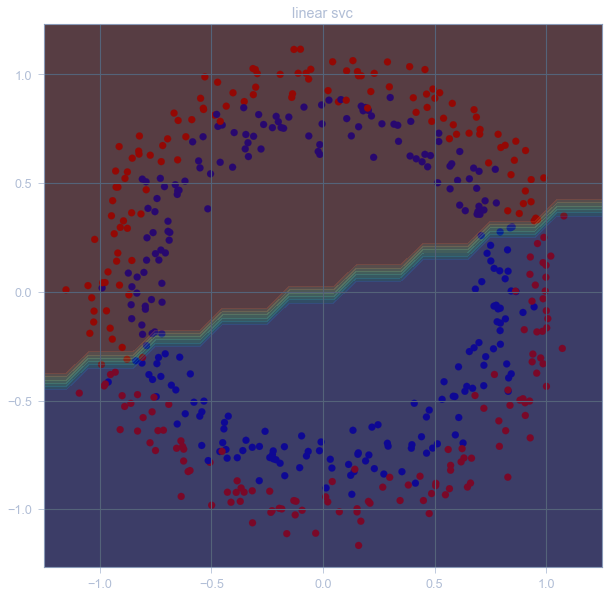

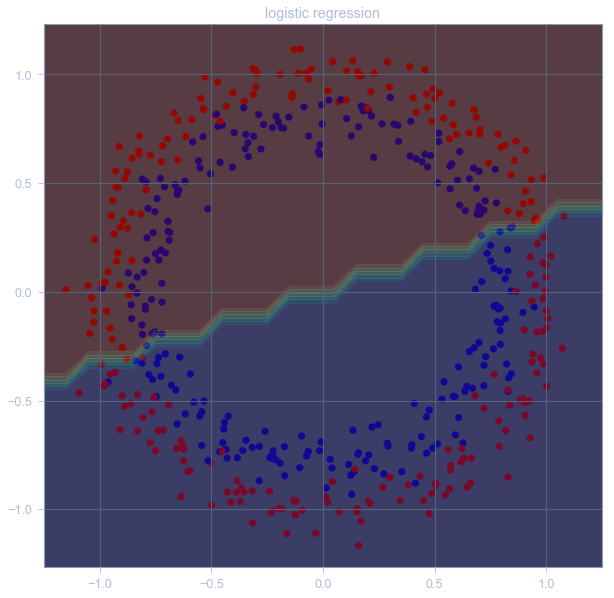

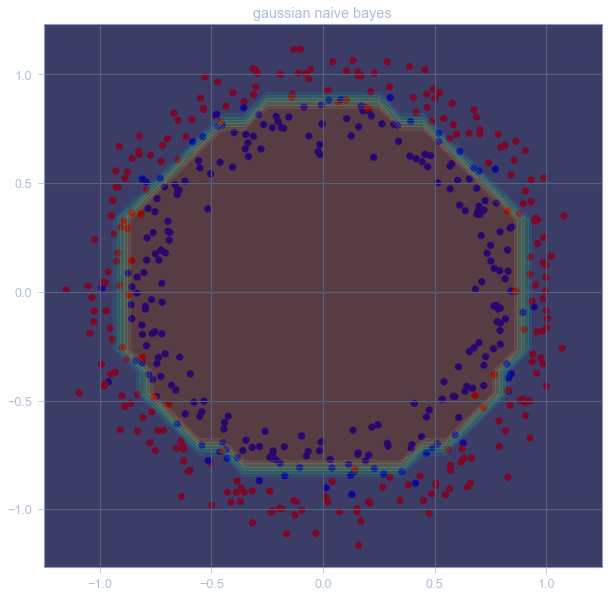

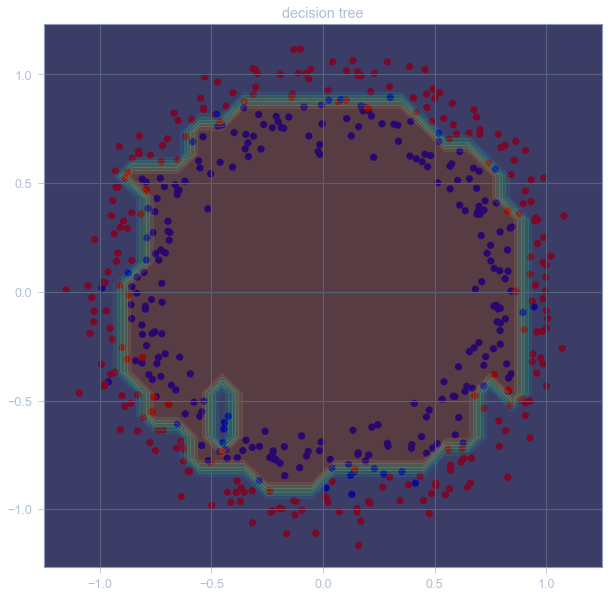

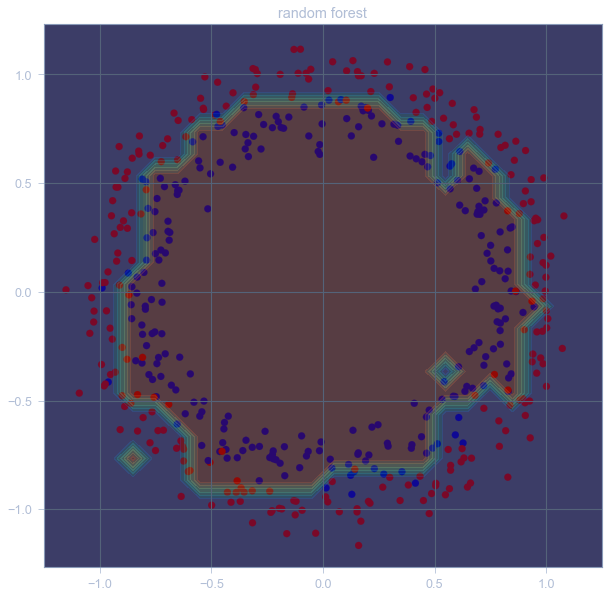

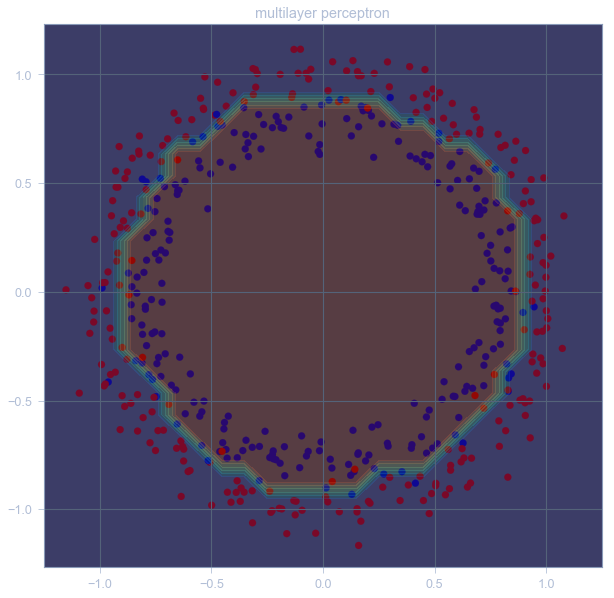

In [12]:
for clf in classifiers:
    visualize_boundary(classifiers[clf], X, y)
    plt.title(clf)
    plt.show()